In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/_scripts")

from analysis.bivariable import BiVariableAnalysis
from outputs.variables import OutputVars, PostProcessedOutputVars

from copy import copy, deepcopy

import pandas as pd

import seaborn as sns
import seaborn.objects as so

from ladybug.datacollection import HourlyContinuousCollection
from ladybug.header import Header
# Apply the default theme
sns.set_theme()

import numpy as np

In [2]:
bv = BiVariableAnalysis("test0")
# bv.update_qois(OutputVars.site_wind_speed, OutputVars.zone_ach)
# bv.run()


## two by two

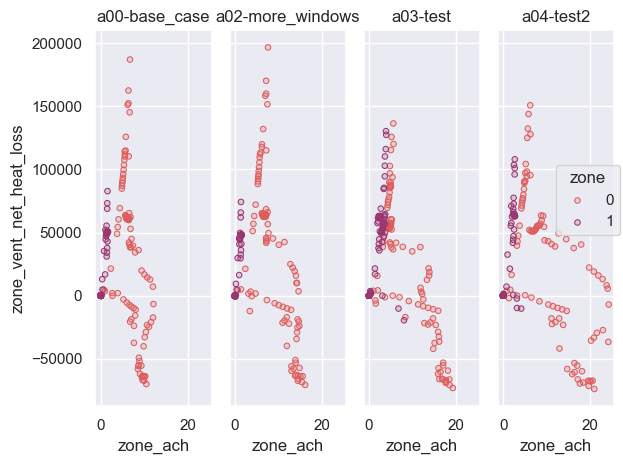

In [3]:
bv.update_qois(OutputVars.zone_ach, PostProcessedOutputVars.zone_vent_net_heat_loss)
bv.update_is_post_process_qoi(qoi2_bool=True)
bv.is_two_by_two = True
bv.run()

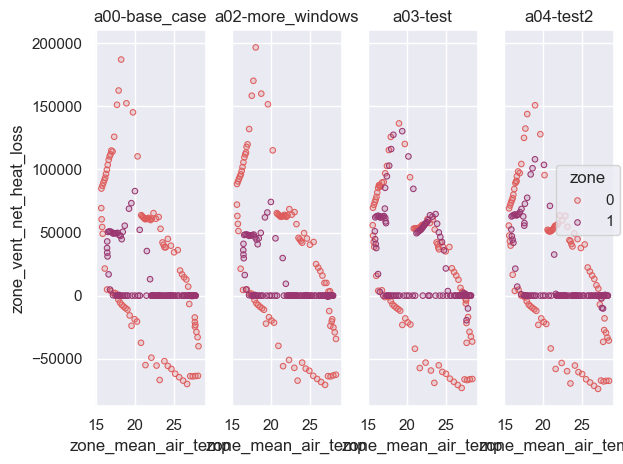

In [4]:
bv.update_qois(OutputVars.zone_mean_air_temp, PostProcessedOutputVars.zone_vent_net_heat_loss)
bv.update_is_post_process_qoi(qoi2_bool=True)
bv.is_two_by_two = True
bv.run()

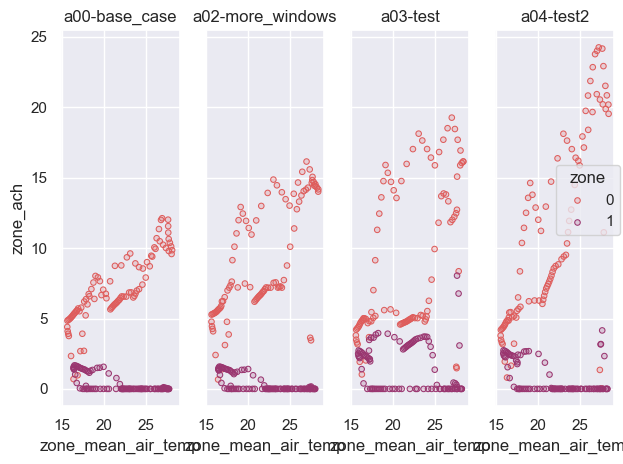

In [6]:
bv.update_qois(OutputVars.zone_mean_air_temp, OutputVars.zone_ach)
bv.update_is_post_process_qoi(qoi2_bool=False)
bv.is_two_by_two = True
bv.run()

## one by two 

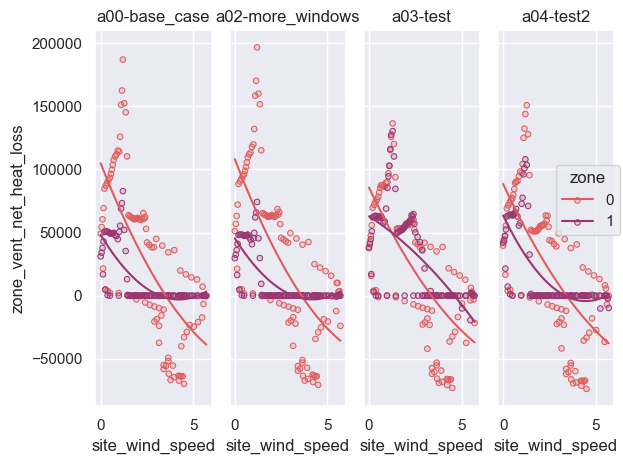

In [3]:
bv.update_qois(OutputVars.site_wind_speed, PostProcessedOutputVars.zone_vent_net_heat_loss)
bv.update_is_post_process_qoi(qoi2_bool=True)
bv.run()

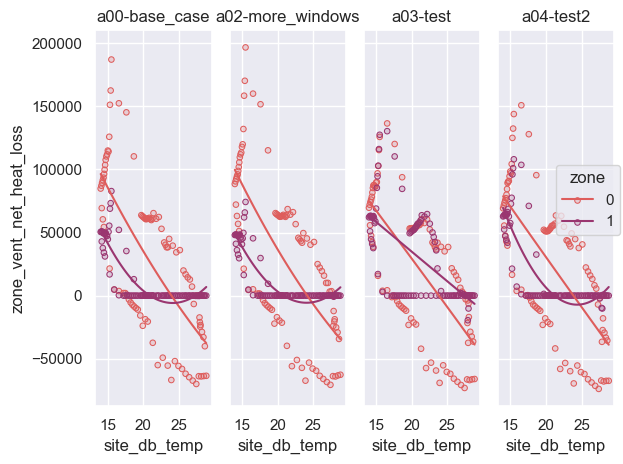

In [4]:
bv.update_qois(OutputVars.site_db_temp, PostProcessedOutputVars.zone_vent_net_heat_loss)
bv.update_is_post_process_qoi(qoi2_bool=True)
bv.run()

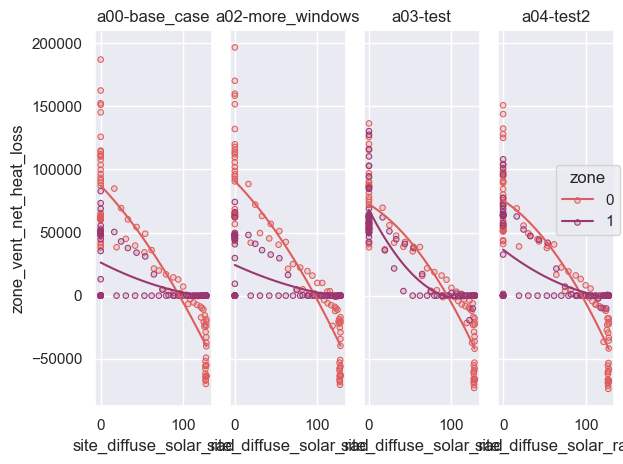

In [8]:
bv.update_qois(OutputVars.site_diffuse_solar_rad, PostProcessedOutputVars.zone_vent_net_heat_loss)
bv.update_is_post_process_qoi(qoi2_bool=True)
bv.is_zonal_data = True
bv.run()

## one by one

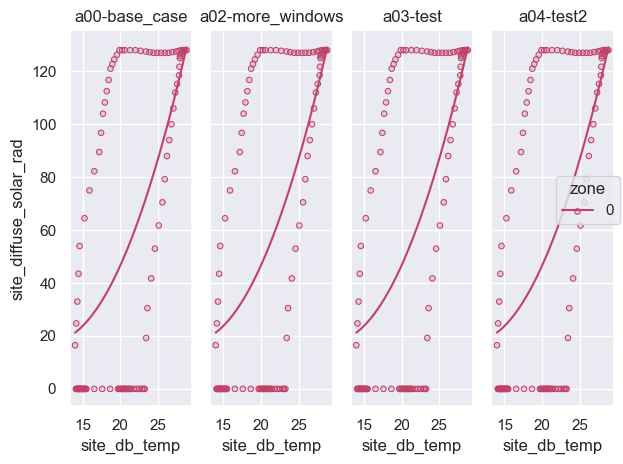

In [6]:
bv.update_qois(OutputVars.site_db_temp, OutputVars.site_diffuse_solar_rad)
bv.update_is_post_process_qoi(qoi2_bool=False)
bv.is_zonal_data = False
bv.run()

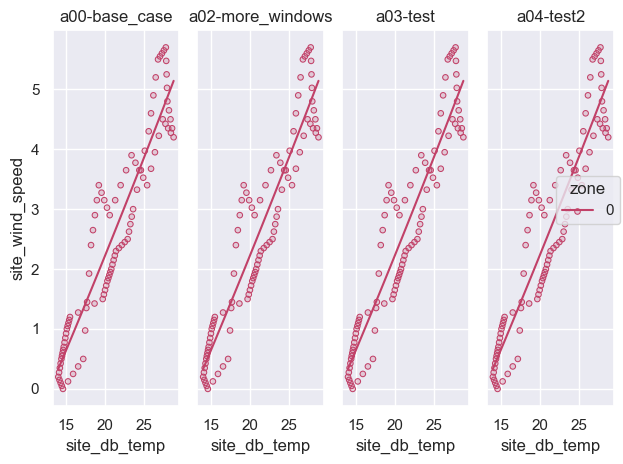

In [5]:
bv.update_qois(OutputVars.site_db_temp, OutputVars.site_wind_speed)
bv.update_is_post_process_qoi(qoi2_bool=False)
bv.is_zonal_data = False
bv.run()

In [ ]:
# bv.update_qois(OutputVars.site_direct_solar_rad , OutputVars.zone_mean_air_temp)
# bv.run()

In [ ]:
# bv.update_qois(OutputVars.site_diffuse_solar_rad , OutputVars.zone_mean_air_temp)
# bv.run()